In [18]:
%tensorflow_version 1.x

# YOLO 학습

YOLO에 대한 커스텀 데이터 학습

https://github.com/qqwweee/keras-yolo3


In [19]:
%%shell
pip uninstall -y keras
pip install keras==2.2.4

Uninstalling Keras-2.2.4:
  Successfully uninstalled Keras-2.2.4
  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl


## 프로젝트 다운로드


In [20]:
%cd /content

!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3


/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 681.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


## YOLO3 모델 다운로드


In [21]:
%cd /content/keras-yolo3

/content/keras-yolo3


## 모델 파일 변환

DarkNet의 모델파일을 Keras에서 사용할 수 있는 모델 파일로 변환한다.


- convert.py : 변환 실행 파일
- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일
- yolov3.weight : Darknet으로 학습된 모델 파일

실행 결과로 다음의 h5 파일로 변환된다. 
- yolov3.h5 : 변환된 모델 파일


In [ ]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [ ]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Using TensorFlow backend.


Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section c

In [ ]:
!ls -al 

total 485192
drwxr-xr-x 6 root root      4096 Aug 25 00:13 .
drwxr-xr-x 1 root root      4096 Aug 25 00:08 ..
-rw-r--r-- 1 root root      1323 Aug 25 00:08 coco_annotation.py
-rw-r--r-- 1 root root     10093 Aug 25 00:08 convert.py
-rw-r--r-- 1 root root      5707 Aug 25 00:08 darknet53.cfg
drwxr-xr-x 2 root root      4096 Aug 25 00:08 font
drwxr-xr-x 8 root root      4096 Aug 25 00:08 .git
-rw-r--r-- 1 root root      1201 Aug 25 00:08 .gitignore
-rw-r--r-- 1 root root      3482 Aug 25 00:08 kmeans.py
-rw-r--r-- 1 root root      1064 Aug 25 00:08 LICENSE
drwxr-xr-x 2 root root      4096 Aug 25 00:08 model_data
-rw-r--r-- 1 root root      4077 Aug 25 00:08 README.md
-rw-r--r-- 1 root root     10686 Aug 25 00:08 train_bottleneck.py
-rw-r--r-- 1 root root      8332 Aug 25 00:08 train.py
-rw-r--r-- 1 root root      1416 Aug 25 00:08 voc_annotation.py
drwxr-xr-x 2 root root      4096 Aug 25 00:08 yolo3
-rw-r--r-- 1 root root      8540 Aug 25 00:08 yolo.py
-rw-r--r-- 1 root root      8342 Au

# 커스텀 데이터 학습


## 데이터 파일 다운로드

In [24]:
%cd /content/keras-yolo3
!wget https://github.com/dhrim/hongik_2020/raw/master/material/deep_learning/dogs_cats_yolo_labeled.zip

/content/keras-yolo3
--2020-08-26 02:21:03--  https://github.com/dhrim/hongik_2020/raw/master/material/deep_learning/dogs_cats_yolo_labeled.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/hongik_2020/master/material/deep_learning/dogs_cats_yolo_labeled.zip [following]
--2020-08-26 02:21:03--  https://raw.githubusercontent.com/dhrim/hongik_2020/master/material/deep_learning/dogs_cats_yolo_labeled.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5478153 (5.2M) [application/zip]
Saving to: ‘dogs_cats_yolo_labeled.zip’

dogs_cats_yolo_labe 100%[===================>]   5.22M  32.5MB/s    in 0

In [25]:
!unzip dogs_cats_yolo_labeled.zip

Archive:  dogs_cats_yolo_labeled.zip
   creating: dogs_cats_yolo_labeled/
  inflating: dogs_cats_yolo_labeled/cat.99.jpg  
  inflating: dogs_cats_yolo_labeled/cat.99.xml  
  inflating: dogs_cats_yolo_labeled/cat.990.jpg  
  inflating: dogs_cats_yolo_labeled/cat.990.xml  
  inflating: dogs_cats_yolo_labeled/cat.9900.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9900.xml  
  inflating: dogs_cats_yolo_labeled/cat.9901.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9901.xml  
  inflating: dogs_cats_yolo_labeled/cat.9902.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9902.xml  
  inflating: dogs_cats_yolo_labeled/cat.9903.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9903.xml  
  inflating: dogs_cats_yolo_labeled/cat.9904.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9904.xml  
  inflating: dogs_cats_yolo_labeled/cat.9905.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9905.xml  
  inflating: dogs_cats_yolo_labeled/cat.9906.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9906.xml  
  inflating: d

## 레이블링 데이터 포멧 변환

dogs_cats_yolo_labeled 폴더 안의 xml 파일들을 읽어서 labels.txt 파일을 생성한다.

In [26]:
%cd /content/keras-yolo3

import os
import glob

CLASS_NAMES = [ "cat", "dog" ] 
# TAGET_FOLDER_NAME = "labels"
TAGET_FOLDER_NAME = "dogs_cats_yolo_labeled"


label_file_names = []
for file_name in glob.glob(TAGET_FOLDER_NAME+'/*.xml'):
  label_file_names.append(file_name)

print(label_file_names)

import xml.etree.ElementTree as ET

all_record = []

for file_name in label_file_names:

  with open(file_name) as in_file:

    tree = ET.parse(in_file)
    root = tree.getroot()

    a_record = [ file_name.replace("xml", "jpg") ]

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in CLASS_NAMES or int(difficult)==1:
            continue
        cls_id = str(CLASS_NAMES.index(cls))
        xmlbox = obj.find('bndbox')
        xmin = xmlbox.find('xmin').text
        ymin = xmlbox.find('ymin').text
        xmax = xmlbox.find('xmax').text
        ymax = xmlbox.find('ymax').text

        a_record.append(",".join([xmin,ymin,xmax,ymax,cls_id]))

    all_record.append(a_record)


with open("labels.txt", "w") as f:
  for a_record in all_record:
    print(a_record)
    f.write(" ".join([str(i) for i in a_record]))
    f.write("\n")

print("labels.txt created.")

/content/keras-yolo3
['dogs_cats_yolo_labeled/cat.9943.xml', 'dogs_cats_yolo_labeled/dog.9980.xml', 'dogs_cats_yolo_labeled/dog.9960.xml', 'dogs_cats_yolo_labeled/cat.9926.xml', 'dogs_cats_yolo_labeled/dog.9964.xml', 'dogs_cats_yolo_labeled/dog.9936.xml', 'dogs_cats_yolo_labeled/cat.9925.xml', 'dogs_cats_yolo_labeled/cat.9950.xml', 'dogs_cats_yolo_labeled/dog.9961.xml', 'dogs_cats_yolo_labeled/dog.9974.xml', 'dogs_cats_yolo_labeled/dog.9962.xml', 'dogs_cats_yolo_labeled/cat.999.xml', 'dogs_cats_yolo_labeled/dog.9956.xml', 'dogs_cats_yolo_labeled/dog.9910.xml', 'dogs_cats_yolo_labeled/dog.9919.xml', 'dogs_cats_yolo_labeled/dog.994.xml', 'dogs_cats_yolo_labeled/dog.9989.xml', 'dogs_cats_yolo_labeled/cat.994.xml', 'dogs_cats_yolo_labeled/cat.9929.xml', 'dogs_cats_yolo_labeled/cat.9918.xml', 'dogs_cats_yolo_labeled/dog.9990.xml', 'dogs_cats_yolo_labeled/cat.9942.xml', 'dogs_cats_yolo_labeled/dog.9903.xml', 'dogs_cats_yolo_labeled/dog.9957.xml', 'dogs_cats_yolo_labeled/cat.9905.xml', 'dogs_

In [27]:
!ls -al labels.txt

-rw-r--r-- 1 root root 11736 Aug 26 02:21 labels.txt


In [28]:
!head labels.txt

dogs_cats_yolo_labeled/cat.9943.jpg 156,27,323,215,0
dogs_cats_yolo_labeled/dog.9980.jpg 29,40,459,432,1
dogs_cats_yolo_labeled/dog.9960.jpg 66,14,383,395,1
dogs_cats_yolo_labeled/cat.9926.jpg 16,25,219,452,0
dogs_cats_yolo_labeled/dog.9964.jpg 60,33,431,248,1
dogs_cats_yolo_labeled/dog.9936.jpg 66,41,259,487,1
dogs_cats_yolo_labeled/cat.9925.jpg 16,45,217,178,0
dogs_cats_yolo_labeled/cat.9950.jpg 42,1,164,196,0
dogs_cats_yolo_labeled/dog.9961.jpg 12,8,154,276,1
dogs_cats_yolo_labeled/dog.9974.jpg 62,14,215,370,1


다음 4개의 파일이 있는 지 확인한다.

cat.99.jpg의 경우 가져온 이미지 파일들이 있는 지를 확인한다.

In [29]:
%%shell
cd /content/keras-yolo3
ls -al dogs_cats_yolo_labeled/cat.99.jpg
ls -al dogs_cats_yolo_labeled/class_names.txt
ls -al labels.txt
ls -al yolov3.h5

-rw-r--r-- 1 root root 6638 Aug 24 01:43 dogs_cats_yolo_labeled/cat.99.jpg
-rw-r--r-- 1 root root 8 Aug 24 23:59 dogs_cats_yolo_labeled/class_names.txt
-rw-r--r-- 1 root root 11736 Aug 26 02:21 labels.txt
-rw------- 1 root root 248686680 Aug 26 02:20 yolov3.h5


## 학습 실행

학습에 필요한 파일은 4개이다.

- 이미지 파일들 : dogs_cats_yolo_labeled/*.jpg
- 클래스 이름 파일 : dogs_cats_yolo_labeled/class_names.txt
- 레이블링 파일 : labels.txt
- 기반 모델 파일 : yolov3.h5

이 파일들을 상수로 선언한다.

In [70]:
CLASS_PATH = 'dogs_cats_yolo_labeled/class_names.txt'
ANNOTATOIN_PATH = 'labels.txt'
PRETRAINED_WEIGHT_PATH = 'yolov3.h5'

NEW_TRAINED_WEIGHT_NAME = "custom_trained.h5"

In [ ]:
INIT_EPOCH = 1   # conv 레이어들을 고정하고 학습
MAIN_EPOCH = 1   # 이후 conv 레이어들까지 학습
BATCH_SIZE = 16

다음 코드는 train.py의 코드를 가져와서 위에 선언된 상수만 바꿔준 코드이다.

In [72]:
"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = ANNOTATOIN_PATH
    log_dir = 'logs/000/'
    classes_path = CLASS_PATH
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path=PRETRAINED_WEIGHT_PATH)
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path=PRETRAINED_WEIGHT_PATH) # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = BATCH_SIZE
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=INIT_EPOCH,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = BATCH_SIZE # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=MAIN_EPOCH,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model_file_name = NEW_TRAINED_WEIGHT_NAME
        model.save_weights(model_file_name)

        print("model saved. ", model_file_name)

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo_weights.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]
 
    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)


_main()


Create YOLOv3 model with 9 anchors and 2 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 21) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((21,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 21) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((21,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights yolov3.h5.
Freeze the first 249 layers of total 252 layers.
Train on 200 samples, val on 22 samples, with batch size 16.
Epoch 1/1
12/12 [==============================] - 23s 2s/step - loss: 4480.0375 - val_loss: 1802.4144
Unfreeze all of the layers.
Train on 200 samples, val on 22 samples, with batch size 16.
model saved.  custom_trained.h5


custom_trained.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 40 boxes for img
dog 0.46 (209, 0) (225, 75)
dog 0.46 (24, 144) (31, 171)
dog 0.46 (169, 142) (201, 155)
dog 0.48 (139, 89) (141, 106)
dog 0.49 (25, 135) (30, 144)
dog 0.49 (29, 145) (33, 175)
dog 0.49 (144, 97) (146, 105)
dog 0.49 (20, 142) (27, 174)
dog 0.50 (99, 31) (103, 42)
dog 0.51 (74, 0) (158, 175)
dog 0.51 (0, 0) (121, -5)
dog 0.53 (0, 0) (50, -5)
dog 0.54 (140, 98) (142, 106)
dog 0.54 (217, 0) (217, -20)
dog 0.56 (64, 0) (103, 175)
dog 0.57 (76, 0) (92, 175)
dog 0.57 (215, 0) (223, 90)
dog 0.61 (218, 0) (225, -3)
dog 0.62 (67, 0) (84, 175)
dog 0.72 (219, 0) (221, -3)
cat 0.64 (146, 100) (150, 114)
cat 0.64 (173, 0) (173, -3)
cat 0.65 (157, 132) (167, 175)
cat 0.65 (142, 100) (146, 112)
cat 0.65 (148, 97) (150, 106)
cat 0.67 (186, 0) (186, 24)
cat 0.68 (172, 0) (182, -10)
cat 0.68 (166, 0) (170, -10)
cat 0.69 (160, 137) (172, 175)
cat 0.72 (182, 0) (190, -8)
cat 0.73 (155, 0) (172, -15)
cat 0.74 (182, 0)

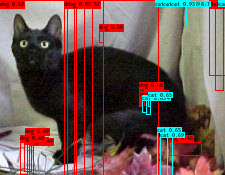

In [73]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

yolo = YOLO(model_path=NEW_TRAINED_WEIGHT_NAME, classes_path=CLASS_PATH)
image = Image.open('dogs_cats_yolo_labeled/cat.99.jpg')
result_image = yolo.detect_image(image)

display(result_image)
